In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (20,10)

In [7]:
df = pd.read_csv('data/dataFinal.csv')

In [8]:
df = df.drop('Unnamed: 0', axis=1)
df.theta = df.theta.astype(float)
df.yDistance = df.yDistance.astype(float)
df.xDistance = df.xDistance.astype(float)
df.columns = ['y', 'x', 'theta', 'width', 'height', 'center_x', 'center_y', 'aspect_ratio', 'height_ratio', 'y_diff']
df2 = df.groupby(['y','x','theta']).agg({'width':'mean', 'height':'mean', 'center_x':'mean', 'center_y':'mean',
                                  'aspect_ratio':'mean', 'height_ratio':'mean', 'y_diff':'mean'}).reset_index()

In [135]:
X = df2.drop(['x', 'y', 'theta'], axis=1)
y = df2['y']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [136]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('NN', MLPRegressor((100,100,100), max_iter=1000)))
models.append(('RF', RandomForestRegressor(n_estimators = 1000, random_state = 42)))

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
models.append(('GB', GradientBoostingRegressor(**params)))

In [137]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NN: 0.170329 (0.272669)
RF: -1.033334 (1.740624)
GB: -1.311500 (1.916564)


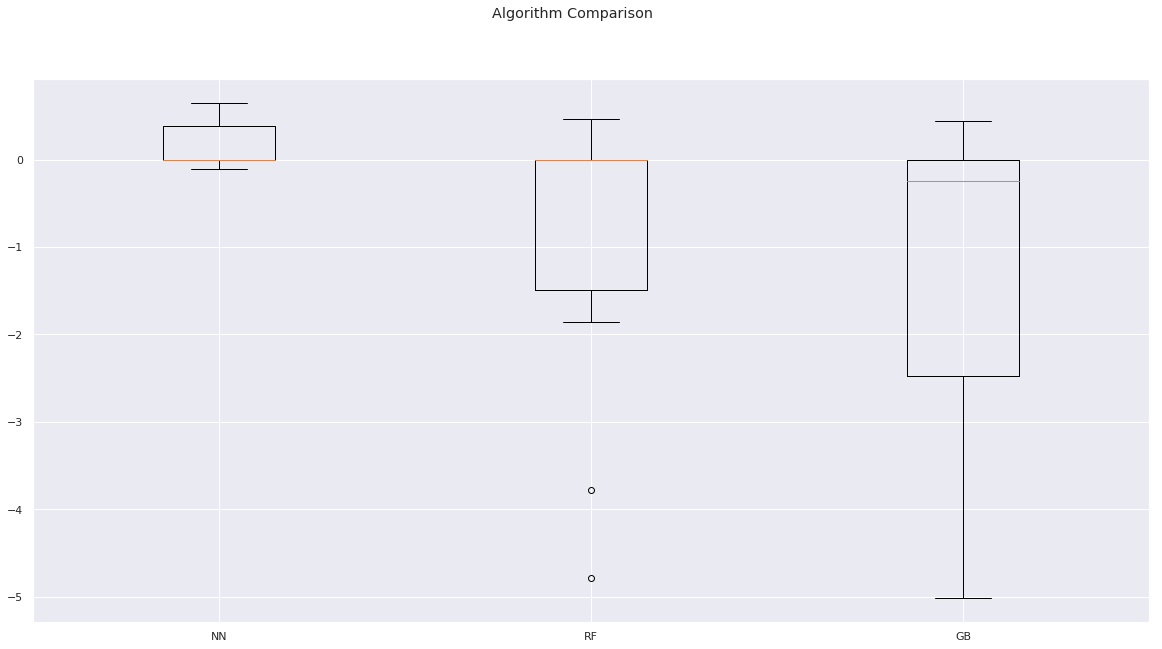

In [138]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [180]:
X = df2.drop(['x', 'y', 'theta'], axis=1)
y = df2['x']
X_train, X_test, y_train, y_test = train_test_split(X,y)
len(y_test)

70

In [182]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gb = GradientBoostingRegressor(**params)
gb = gb.fit(X_train, y_train)

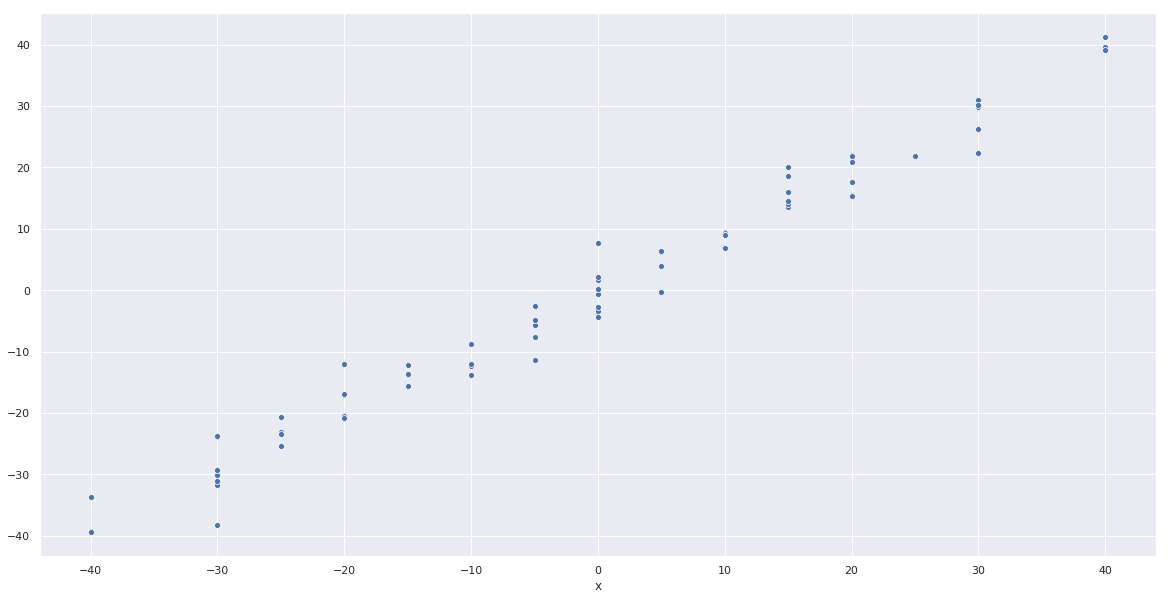

In [183]:
sns.scatterplot(y_test, gb.predict(X_test))

In [184]:
accuracy = ( gb.score ( X_test , y_test ))
accuracy

0.9772935565459804

In [185]:
joblib.dump(gb, "xGBR.joblib.dat")

['xGBR.joblib.dat']